In [3]:
import pandas as pd
import torch 
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F 
diabetes_df = pd.read_csv("diabetes.csv")
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

torch.manual_seed(42)
ann = ANN_Model()

loss_function = nn.CrossEntropyLoss()
#SUBBED INSTEAD of ADAM
optimizer = torch.optim.ASGD(ann.parameters(), lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0, foreach=None, maximize=False, differentiable=False, capturable=False)
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step() 

        

tensor([[  1.0000,  95.0000,  60.0000,  ...,  23.9000,   0.2600,  22.0000],
        [  5.0000, 105.0000,  72.0000,  ...,  36.9000,   0.1590,  28.0000],
        [  0.0000, 135.0000,  68.0000,  ...,  42.3000,   0.3650,  24.0000],
        ...,
        [ 10.0000, 101.0000,  86.0000,  ...,  45.6000,   1.1360,  38.0000],
        [  0.0000, 141.0000,   0.0000,  ...,  42.4000,   0.2050,  29.0000],
        [  0.0000, 125.0000,  96.0000,  ...,  22.5000,   0.2620,  21.0000]])


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

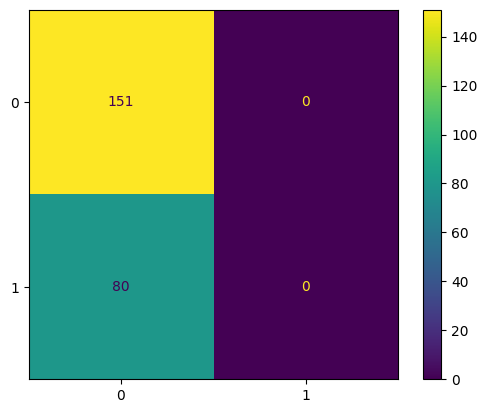

In [7]:
y_pred = []
with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


How does it work? Try at least one other optimization function with the diabetes dataset shown in class. How does the model perform with the new optimizer? Did it perform better or worse than Adam? Why do you think that is?

This is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. Instead of the classical stochastic gradient descent of the loss function, this functions as a replacement for updating network iterative data based on the training data.
The accuracy is 64% in this(torch.optim.ASGD) compared to the accuracy of 75% using adam. This is because the diabetes data is too small, a lot of nan values(should have preprocessed), and it has a lot of continous data.